# 課題: カメラ画像の操作と基本画像処理

以下の課題に取り組んでください:

カメラから取得した画像から
1. キー入力でカメラのズームイン、ズームアウトを行う。
2. フレームの大津の二値化を行い、その結果を表示する。
3. フレームから青色だけを抽出して表示する。


# 作成したコードの説明
以下のようにキーボードのキーを押すことで、課題である二値化、ズームイン、ズームアウト、青色抽出を実行し結果を表示する事ができる
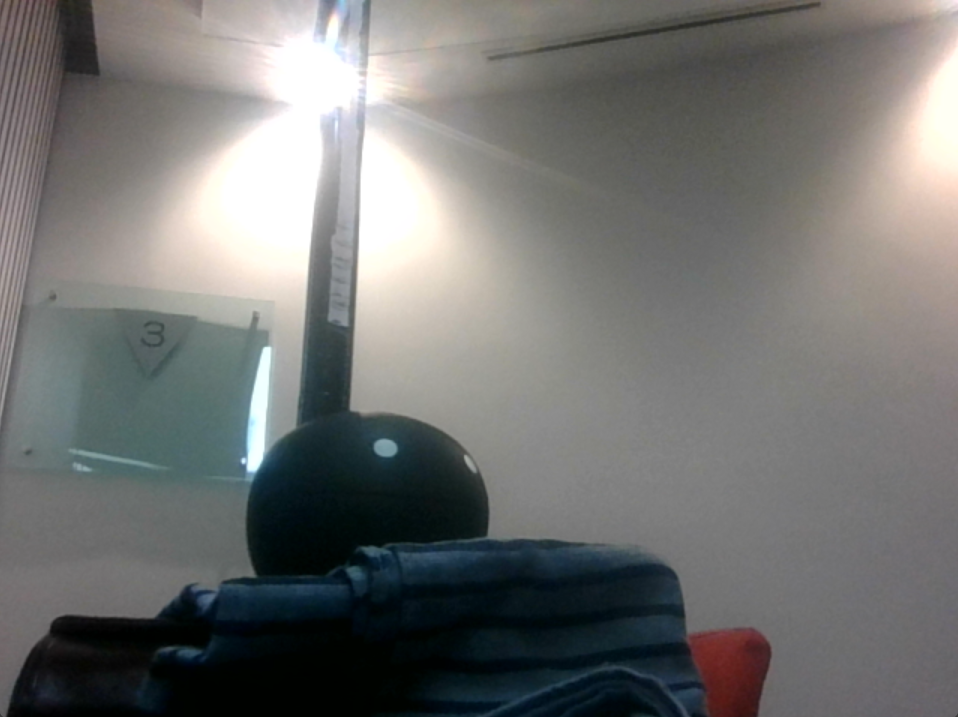
'g'  : 白黒切り替え
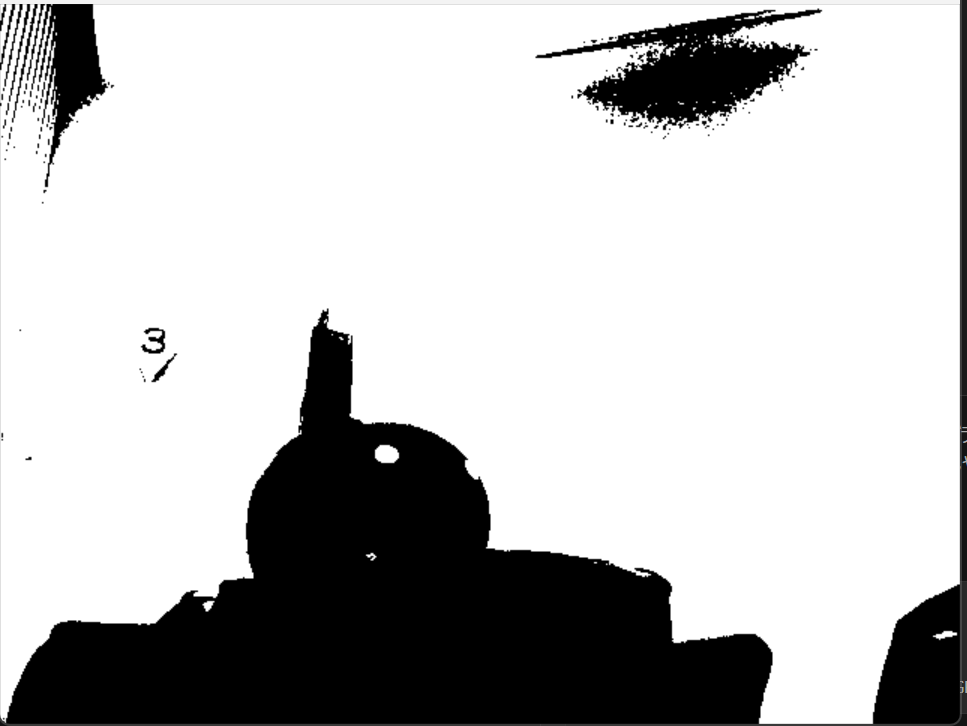
'i'  : ズームイン
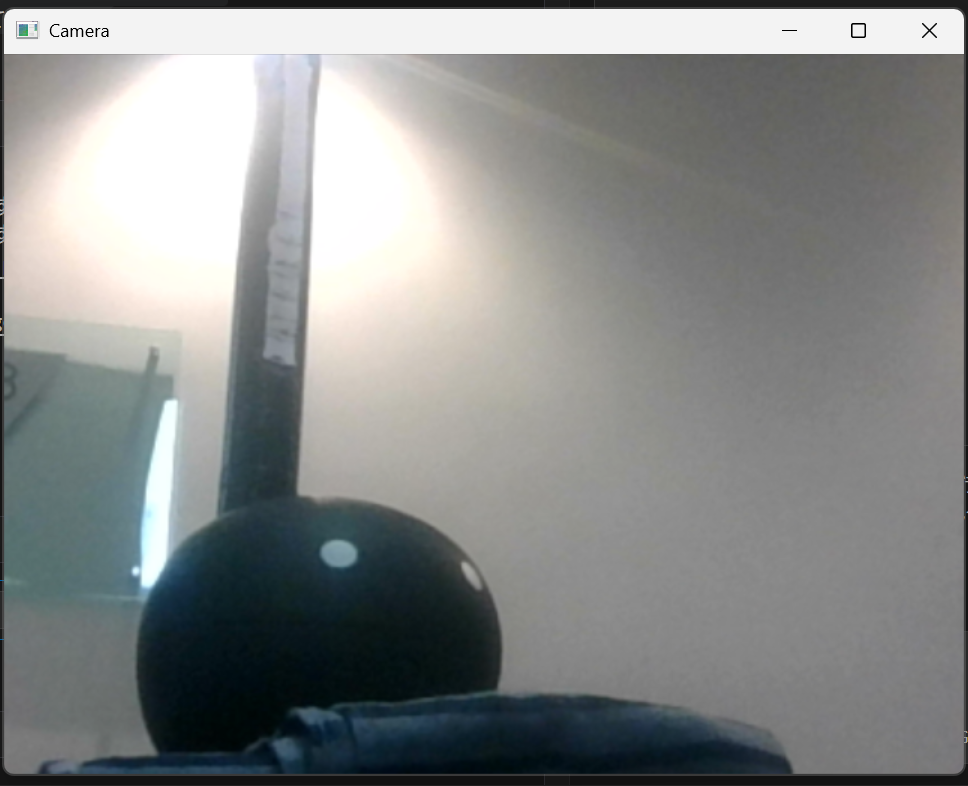
'o'  : ズームアウト

'b'  : 青色抽出
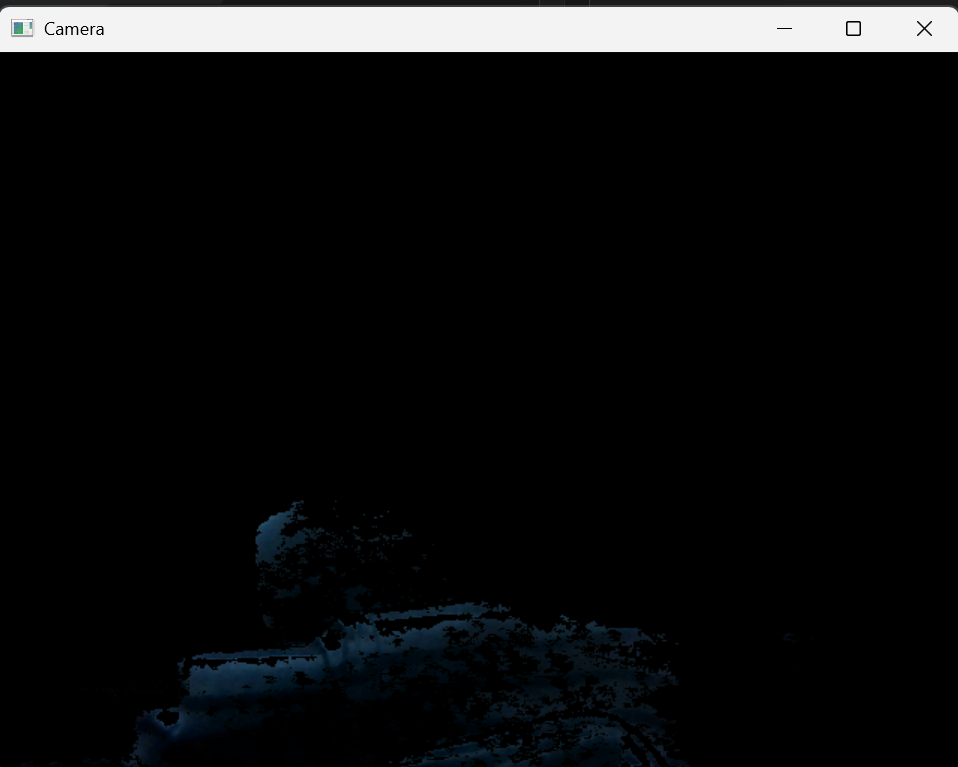

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
camera_num = 0
nichika=1
blue=1
zoom_factor = 1.0
zoom_step = 0.5

# カメラ初期化
cap = cv2.VideoCapture(camera_num)

# 解像度の設定
width, height = 640, 480
# 幅をwidthに設定
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
# 高さをheightに設定
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)

# もしカメラが見つからなかったら終了
if not cap.isOpened():
    print("カメラが見つかりませんでした")
    exit()
focus_mode = 0  # フォーカスモード (0: 自動, 1: 手動)

print("カメラ操作: ")
print("  'Esc': 終了")
print("  'g'  : 白黒切り替え")
print("  'i'  : ズームイン")
print("  'o'  : ズームアウト")
print("  'b'  : 青色抽出")

# ループ
while True:
    # 画像取得
    # -- 第一戻り値 ret ... フレームの取得に成功したかどうか
    # -- 第二戻り値 frame ... 取得したフレーム
    ret, frame = cap.read()

    # 失敗してたら終了
    if not ret:
        print("フレームの取得に失敗しました")
        break

    # ズーム処理
    if zoom_factor != 1.0:
        center_x, center_y = width // 2, height // 2
        radius_x, radius_y = int(width // (2 * zoom_factor)), int(height // (2 * zoom_factor))
        min_x, max_x = center_x - radius_x, center_x + radius_x
        min_y, max_y = center_y - radius_y, center_y + radius_y
        frame = frame[min_y:max_y, min_x:max_x]
        frame = cv2.resize(frame, (width, height))

    if nichika == -1:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, frame = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if blue == -1:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        lower_blue = np.array([100, 150, 0])
        upper_blue = np.array([140, 255, 255])
        mask = cv2.inRange(hsv, lower_blue, upper_blue)
        frame = cv2.bitwise_and(frame, frame, mask=mask)

    # キー入力待ち
    key = cv2.waitKey(1) & 0xFF
    if key == 27:  # Escキーで終了
        break
    elif key == ord('g'):  # gキーで2値化切り替え
        blue=1
        nichika = nichika * -1
        if nichika == -1:
            print("二値化ON")
        if nichika == 1:
            print("二値化OFF")
    elif key == ord('i'):  # '+'キーでズームイン
        zoom_factor += zoom_step
        print(f"ズームイン: {zoom_factor}")
    elif key == ord('o'):  # '-'キーでズームアウト
        zoom_factor = max(1.0, zoom_factor - zoom_step)
        print(f"ズームアウト: {zoom_factor}")
    elif key == ord('b'):  # 'b'キーで青色抽出
        nichika=1
        blue*=-1
        if blue == -1:
            print("青色抽出ON")
        if blue == 1:
            print("青色抽出OFF")
    # 画像表示
    cv2.imshow('Camera', frame)
cap.release()
cv2.destroyAllWindows()

カメラ操作: 
  'Esc': 終了
  'g'  : 白黒切り替え
  'i'  : ズームイン
  'o'  : ズームアウト
  'b'  : 青色抽出
二値化ON
二値化OFF
二値化ON
二値化OFF
ズームイン: 1.5
ズームアウト: 1.0
青色抽出ON
